In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append("../")
from diabnet.apply_ensemble import Predictor
from diabnet.data import get_feature_names, encode_features
from diabnet.ensemble import Ensemble

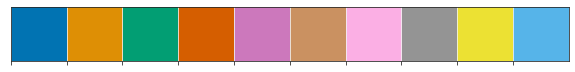

In [18]:
colors = sns.color_palette("colorblind")
sns.palplot(colors)
sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-'})

In [19]:
def plot():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    color_boxplot = sns.color_palette("cool", n_colors=20)
#     plt.title(f"patient\n(id: {df['id'].iloc[id]}, age: {age}, diagnostic: {'positive' if label==1 else 'negative'})")
#     sns.boxplot(x=[i for i in probs_life[1]], y=probs_life[0], showfliers=False, palette=[color_boxplot[int(np.median(a)*20)] for a in probs_life[0]]);
    bp1 = plt.boxplot(probs_life[0], showfliers=False, patch_artist=True, labels=[i for i in probs_life[1]], medianprops=dict(linewidth=2.5, color='black'))
    colors = [color_boxplot[int(np.median(a)*20)] for a in probs_life[0]]
    for box, color in zip(bp1['boxes'], colors):
        box.set(facecolor = color)
        box.set(edgecolor = 'black')
    plt.xlabel("age")
    plt.ylim(0,1);
    plt.subplot(122)
    plt.title("negative control\n(non-diabetic older than 60 years)")
#     sns.boxplot(x=[i for i in neg_life[1]], y=neg_life[0], showfliers=False, palette=[color_boxplot[int(np.median(a)*20)] for a in neg_life[0]]);
    bp2 = plt.boxplot(neg_life[0], showfliers=False, patch_artist=True, labels=[i for i in neg_life[1]], medianprops=dict(linewidth=2.5, color='black'))
    colors = [color_boxplot[int(np.median(a)*20)] for a in neg_life[0]]
    for box, color in zip(bp2['boxes'], colors):
        box.set(facecolor = color)
        box.set(edgecolor = 'black')
    plt.xlabel("age")
    plt.ylim(0,1);

In [20]:
# ensemble = Ensemble('../diabnet/models/model-4-soft-label-age-positives-500-dropout0-bn-decay-flood-hyperopt-ax-batch256-adamw-lc2-20201001')
# c = get_feature_names("../datasets/visits_sp_unique_test_positivo_1000_random_0.csv", BMI=False, sex=True, parents_diagnostics=True)
# pred = Predictor(ensemble, c, "../datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv")

In [21]:
ensemble = Ensemble('../results/models/positive/model-positive-21-adamw-lc7-2021-10-05')
c = get_feature_names("../data/datasets/visits_sp_unique_test_positivo_1000_random_0.csv", use_sex=True, use_parents_diagnosis=True)
pred = Predictor(ensemble, c, "../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv")

NEGATIVE FILE ../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv


In [22]:
neg_life = pred.negatives_life(samples_per_model=1)

## Análise do baseline

O uso de Integrated Gradients depende da definição de um baseline. Esse baseline é um exemplo de entrada que define um caso para ser utilizado como um âncora (base) relativa.

Optamos aqui por utilizar como baseline um indivíduo hipotético que apresenta alelos dominantes (**0**) para todos os SNPs. A idade desse indivíduo é a mesma para os demais sendo analisado e o diagnóstico dos pais é **negativo**.

Abaixo analisaremos qual a predição para esse indivíduo.

In [93]:
baseline_snps = [0 for i in range(1000)]

In [94]:
baseline = np.array(baseline_snps + [50., 'F', 0, 0], dtype=object)

In [95]:
baseline[-10:]

array([0, 0, 0, 0, 0, 0, 50.0, 'F', 0, 0], dtype=object)

In [96]:
probs_life = pred.patient_life(baseline)

In [100]:
# probs_life[0]

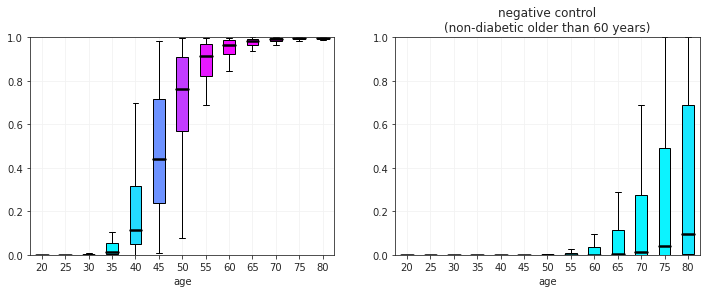

In [99]:
plot()

In [89]:
np.mean(probs_life[0][0])

0.9700001

In [85]:
import torch
ensemble.models[0].apply(torch.Tensor(encode_features(c, baseline)))

RuntimeError: running_mean should contain 2 elements not 21

In [104]:
encode_features?

In [84]:
pred._encode_features(baseline)[0,:,-20:]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 2., 0., 0., 2.,
         0., 0.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [ ]:
####################################

In [101]:
training_set = pd.read_csv("../data/datasets/visits_sp_unique_train_positivo_1000_random_0.csv")

In [103]:
training_set.describe()

,Unnamed: 0,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,snp_18_56742728,...,snp_20_52032233,snp_20_26104019,snp_20_50189624,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,T2D,mo_t2d,fa_t2d
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,...,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,895.500000,0.001674,0.153460,0.177455,0.119420,0.072545,0.485491,0.155134,0.098772,0.002790,...,0.141741,0.114955,0.528460,0.274554,0.007812,0.166295,42.160714,0.226004,1.045759,1.477121
std,517.450159,0.040893,0.506131,0.403481,0.324372,0.368019,0.499929,0.378714,0.300304,0.052763,...,0.393979,0.319057,0.607302,0.446414,0.088067,0.373945,17.516806,0.418359,0.852705,0.786919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,447.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000
50%,895.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,1.000000,2.000000
75%,1343.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,54.000000,0.000000,2.000000,2.000000
max,1791.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,97.000000,1.000000,2.000000,2.000000


In [127]:
cols = [c for c in training_set.columns if 'snp' == c[:3]] 
baseline_snp_mode = training_set[cols].mode().values[0]

In [149]:
baseline = np.append(baseline_snp_mode*2, np.array([50., 'F', 0, 0], dtype=object))

In [150]:
baseline[-10:]

array([0, 0, 0, 0, 0, 0, 50.0, 'F', 0, 0], dtype=object)

In [151]:
probs_life = pred.patient_life(baseline)

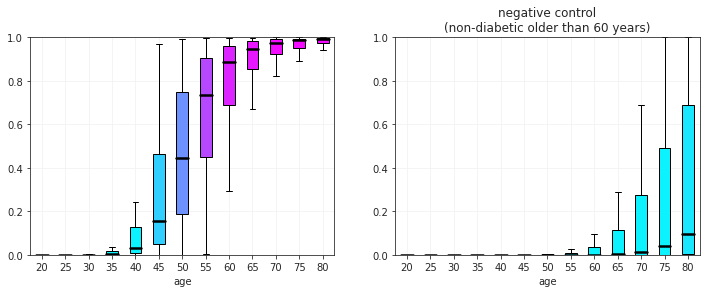

In [152]:
plot()

In [138]:
negative_set = pd.read_csv("../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv")

In [139]:
negative_set.describe()

,Unnamed: 0,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,snp_18_56742728,...,snp_20_52032233,snp_20_26104019,snp_20_50189624,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,T2D,mo_t2d,fa_t2d
count,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,...,89.000000,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,89.0,89.000000,89.000000
mean,257.494382,0.0,0.483146,0.089888,0.348315,0.337079,0.516854,0.404494,0.044944,0.0,...,0.325843,0.292135,0.640449,0.404494,0.0,0.393258,66.247191,0.0,1.449438,1.775281
std,157.830830,0.0,0.827268,0.287641,0.479136,0.752931,0.502547,0.516084,0.208355,0.0,...,0.517320,0.457320,0.678353,0.493575,0.0,0.491241,6.133516,0.0,0.852953,0.598346
min,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,60.000000,0.0,0.000000,0.000000
25%,129.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,61.000000,0.0,1.000000,2.000000
50%,228.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,64.000000,0.0,2.000000,2.000000
75%,382.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,70.000000,0.0,2.000000,2.000000
max,547.000000,0.0,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.0,...,2.000000,1.000000,2.000000,1.000000,0.0,1.000000,86.000000,0.0,2.000000,2.000000


In [140]:
baseline_snp_mode_neg = negative_set[cols].mode().values[0]

In [141]:
baseline_snp_mode_neg

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [153]:
baseline = np.append(baseline_snp_mode_neg*2, np.array([50., 'F', 0, 0], dtype=object))

In [154]:
probs_life = pred.patient_life(baseline)

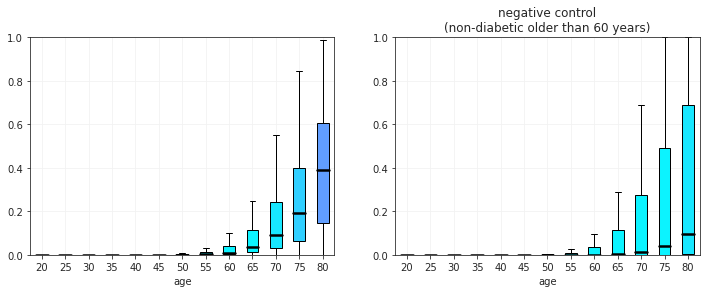

In [155]:
plot()